EOmaps example 2: Data-classification and multiple Maps in one figure

In [1]:
%matplotlib widget
from eomaps import MapsGrid, Maps
import pandas as pd
import numpy as np

----------- create some example-data

In [2]:
lon, lat = np.meshgrid(np.arange(-20, 40, 0.5), np.arange(30, 60, 0.5))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data_variable=np.sqrt(lon**2 + lat**2).flat)
)
data = data.sample(4000)  # take 4000 random datapoints from the dataset

D:\python_modules\eomaps\eomaps\eomaps.py:461: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') when using the 'ipympl' backend to avoid recursions during callbacks!
  "EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') "


EOmaps: Parameter was set to: 'data_variable'
EOmaps: estimating radius...
EOmaps: The estimated radius is: 0.2500
EOmaps: Parameter was set to: 'data_variable'
EOmaps: estimating radius...
EOmaps: The estimated radius is: 0.2500
EOmaps: Parameter was set to: 'data_variable'
EOmaps: estimating radius...
EOmaps: The estimated radius is: 0.2500
EOmaps: estimating radius...
EOmaps: The estimated radius is: 0.2500
FETCHTED A BACKGROUND


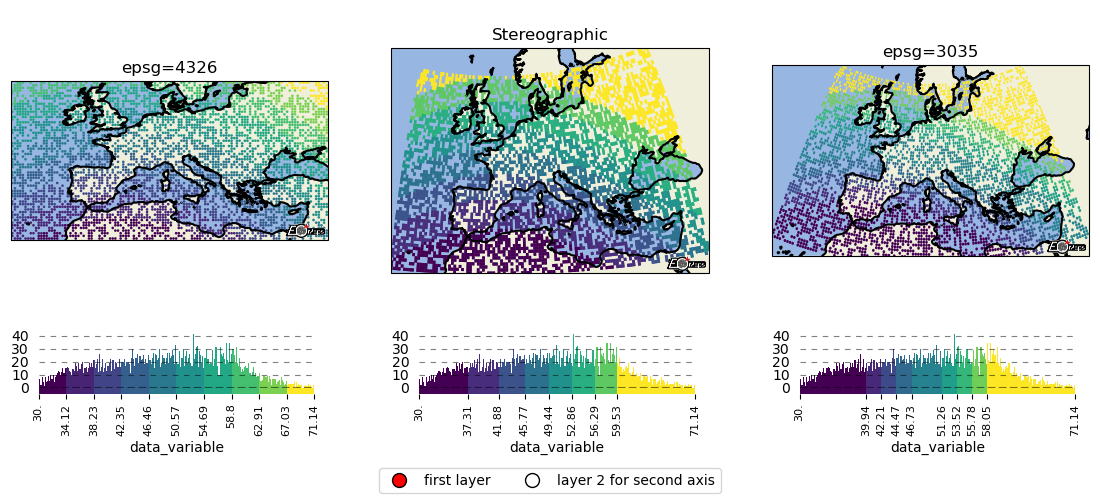

In [3]:
# ------------------------------------
# initialize a grid of Maps objects
mg = MapsGrid(
    1,
    3,
    crs=[4326, Maps.CRS.Stereographic(), 3035],
    figsize=(11, 5),
    bottom=0.15,
    layer="first layer",
)
# set the data on ALL maps-objects of the grid
mg.set_data(data=data, xcoord="lon", ycoord="lat", in_crs=4326)
mg.m_0_0.ax.set_title("epsg=4326")
mg.m_0_0.set_classify_specs(scheme="EqualInterval", k=10)

#--------- set specs for the second axis
mg.m_0_1.ax.set_title("Stereographic")
mg.m_0_1.set_shape.rectangles()
mg.m_0_1.set_classify_specs(scheme="Quantiles", k=8)
mg.m_0_1.plot_map()

# --------- set specs for the third axis
mg.m_0_2.ax.set_extent(mg.m_0_2.crs_plot.area_of_use.bounds)

mg.m_0_2.ax.set_title("epsg=3035")
mg.m_0_2.set_classify_specs(
    scheme="StdMean", multiples=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1]
)

# --------- plot all maps and add colorbars to all maps
mg.plot_map()
mg.add_colorbar()

# clip the ocean shape by the plot-extent to avoid re-projection issues
mg.add_feature.preset.ocean()
mg.add_feature.preset.land()
mg.add_feature.preset.coastline(layer="all")  # add the coastline to all layers

# --------- add a new layer for the second axis
# (simply re-plot the data with a different classification and plot-shape)

# NOTE: this layer is not visible by default but it can be shown by clicking<br>
# on the layer-switcher utility buttons (bottom center of the figure)

m2 = mg.m_0_1.new_layer(
    layer="layer 2 for second axis", copy_data_specs=True, copy_plot_specs=True
)
m2.set_shape.delaunay_triangulation(mask_radius=max(m2.shape.radius) * 2)
m2.set_classify_specs(scheme="Quantiles", k=4)
m2.set_plot_specs(cmap="RdYlBu")
m2.plot_map()
m2.add_colorbar()

# --------- add some callbacks to indicate the clicked data-point to all maps

for m in mg:
    m.cb.pick.attach.mark(
        fc="r",
        ec="none",
        buffer=1,
        permanent=True,
    )
    m.cb.pick.attach.mark(
        fc="none",
        ec="r",
        lw=1,
        buffer=5,
        permanent=True,
    )
    m.cb.click.attach.mark(
        fc="none",
        ec="k",
        lw=2,
        buffer=10,
        permanent=False,
    )
    m.add_logo()
# add an annotation-callback to the second map
mg.m_0_1.cb.pick.attach.annotate(text="the closest point is here!", zorder=99)

# share click & pick-events between all Maps-objects of the MapsGrid
mg.share_click_events()
mg.share_pick_events()

# --------- add a layer-selector widget

mg.util.layer_selector(ncol=2, loc="lower center", draggable=False)

# --------- rotate the ticks of the colorbars

for m in mg:
    m.figure.ax_cb.tick_params(rotation=90, labelsize=8)
m2.figure.ax_cb.tick_params(rotation=90, labelsize=8)

# trigger a final re-draw of all layers to make sure the manual<br>
# changes to the ticks are properly reflected in the cached layers.

mg.redraw()